# ディリクレ分布とガウス分布　pp.74-88
-----------------------------------------------

### 目次
- 2.2.1 ディリクリ分布 (pp.74-76)<br>
- 2.3 ガウス分布 (pp.76-82)
   * 2.3.1  条件付きガウス分布 (pp.82-85)<br>
   * 2.3.2  周辺分布 (pp.85-88)<br>

<br/>

## 2.2.1 ディリクレ分布
### 2.2.1-1. 概要
* 「ある$n$個の事象について i番目の事象が$α_i−1$回発生した場合に、その**事象の起こる確率が$x_i$である確率**」の分布（サイコロなら「目の出やすさ」の分布）

* 連続型の確率分布（なので、確率密度関数である）
* ベータ分布を多変量に拡張して一般化した形（別名：多変量ベータ分布）
* 多項分布のパラメータについての共役事前分布
>”事前分布として共役事前分布を用いると、事後分布の関数の形が事前分布と同じになる” (pp.65-66)<br/>
>つまり "共役事前分布×尤度 =事後分布"<br/>
>例）ベータ分布 × 二項分布 ＝ ベータ分布<br/>
>例）ディレクレ分布 × 多項分布 ＝ ディレクレ分布

* トピックモデルの潜在ディリクレ過程(Latent Dirichlet Allocation; LDA) in 自然言語処理

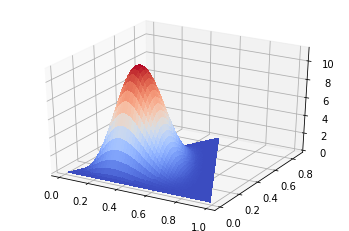

In [5]:
#３面しか無いサイコロを10回振って各面が2回、3回、5回出た時の各面が出る確率の分布

import numpy as np
from scipy.stats import dirichlet
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')

# triangle mesh grid (0,0)-(1,0)-(0,1)
xx = np.array([[0.01*a*0.01*(100-b) for a in range(1, 100)] for b in range(1, 100)])
yy = np.array([[0.01*b] * 99 for b in range(1, 100)])

# Dirichlet PDF on mesh grid ((0,0)->(0,0,1), (1,0)->(1,0,0), (0,1)->(0,1,0))
a, b, c = (2, 3, 5)
di = dirichlet([a+1, b+1, c+1]) #パラメーターを(2+1, 3+1, 5+1)とした
Z = di.pdf([xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# transform isosceles right triangle mesh into equilateral triangle
xx2 = np.array([x + (0.5 - np.average(x)) for x in xx])
yy2 = yy * np.sqrt(3) / 2

# 3D plot
ax.plot_surface(xx2, yy2, Z, cmap=cm.coolwarm, antialiased=False)
plt.show()

(図1) ３面しか無いサイコロを10回振って各面が2回、3回、5回出た時の各面が出る確率の分布
* ３面しか無いサイコロを10回振って各面が2回、3回、5回出た時の各面が出る確率の分布
* 三角形の各頂点がサイコロの各面に対応
* 三角形内の各頂点への近さが各面の出る確率に対応
* 上方向の高さがその確率の組み合わせになる確率であり、高いほど高温の色になっている。
* 右下の頂点が1つ目の面、右上の頂点が2つ目の面、左の頂点が3つ目の面に対応する。
* XYZ空間で右下の頂点が(1,0,0)、右上の頂点が(0,1,0)、左の頂点が(0,0,1)にあるとすれば、三角形内の点のX座標、Y座標、Z座標が各面の出る確率<br/><br/>

<img src="dirichlet08.png">

(図2) ３面しか無いサイコロを10回振って各面が2回、3回、5回出た時の各面が出る確率の分布（二次元）<br/>
二次元にすると、確かに(0.2, 0.3, 0.5)に対応しそうな所が頂点になっている。<br/>

(参考サイト）http://ynomura.dip.jp/archives/2018/03/post_66.html

<br/>

### 2.2.1-2. 教科書内容とコード
* **多項分布のパラメータについての共役事前分布はディレクレ分布である**ことを示している
* 2.1.1と同様に導出すればよい
>2.1.1のベータ分布のとき、p.69にて "パラメータ$μ$の事後分布は、ベータ事前分布×二項尤度関数を正規化すれば求まる"と書いてあった。
$$
\begin{align}
Beta(μ|a, b)Bin(m|N, μ)
& = \frac{Γ(a+b)}{Γ(a)Γ(b)}μ^{a-1}(1-μ)^{b-1}
\begin{pmatrix}
N \\
m\\
\end{pmatrix}
μ^m(1-μ)^{N-m}\\
& = p(μ|m, l, a, b)\\
& = \frac{Γ(m+a+l+b)}{Γ(m+a)Γ(l+b)}μ^{m+a-1}(1-μ)^{l+b-1}\quad \quad (2.18)
\end{align}
$$
<br/>
>たしかに "ベータ分布 × 二項分布 "からベータ分布の事後分布が求まっている

多項分布$Mult(m_1, m_2, ..., m_K|μ, N)=\begin{pmatrix}
N \\
m_1m_2...m_K \\
\end{pmatrix}
\prod_{k=1}^{K}μ ^{m_k}_{k}(2.34)$（尤度関数）のパラメータ{$ μ_k $}に対する事前分布$p(μ_k)$の共役分布（共役事前分布）は

$$
p(\textbf μ|\textbf α) ∝ \prod_{k=1}^{K}μ ^{α_k-1}_{k} \quad \quad (2.3.7)
$$ 

* $α$はパラメータ{$μ_k$}の分布を決める（＝超パラメータ）
    * $α=(α_1, ..., α_K)^{\mathrm{T}}$
    * $0≦μ_k≦1, \sum_{k}μ_k=1$
<br/>
* $K$は次元に関する変数で、$μ_k$ は$K-1$次元の単体に制限されて分布している。

<span style="color:red">疑問</span>▶️多項分布の形式からわかるように、と言われると自信がない<br/>

次に  $(2.37)$  を正規化する。<br/>

(演習2.9)http://prml.2apes.com/2-9-ディリクレ分布の正規化/ より

$$ 
Dir(\textbf μ|\textbf α) = \frac{Γ(α_0)}{Γ(α_1)…Γ(α_K)}\prod_{k=1}^{K}μ ^{α_k-1}_{k}\quad \quad (2.38)
$$

<br/>
求まったのはディレクレ分布（多項分布に対する共役事前分布）である。このとき
* $Γ(x)≡\int_{0}^{∞}μ^{x-1}e^{-u}du\quad(1.141)$
* $α_0=\sum_{k=1}^{K} α_k\quad \quad (2.39)$

以上より、パラメータ{$μ_k$}の事後分布は  "共役事前分布$(2.38)$×尤度関数$(2.34)$"  から
$$
p(\textbf μ|D, \textbf α) ∝ p(D|\textbf μ) p(\textbf μ|\textbf α)∝ \prod_{k=1}^{K}μ ^{α_k+m_k-1}_{k} \quad \quad (2.40)
$$ 
たしかに$(2.40)$はディレクレ分布となっている。

このとき正規化係数は
\begin{eqnarray*}
p(\textbf μ|D, \textbf α) = Dir(\textbf μ|\textbf α+\textbf m) 
= \frac{Γ(α_0+N)}{Γ(α_1+m_1)…Γ(α_K+m_K)}\prod_{k=1}^{K}μ ^{α_k+m_k-1}_{k}\quad \quad (2.41)
\end{eqnarray*}

ただし、$ \textbf m=(m_1, ...., m_K)^{\mathrm{T}}$

<br/>
<br/>

## 2.3 ガウス分布

### 2.3-1. 概要
* ガウス分布= 正規分布
* 〇〇変量＝〇〇次元（例：多変量ガウス分布＝多次元ガウス分布）
* 連続型の確率分布（なので確率密度関数：ガウス関数）
* エントロピーを最大化する分布（演習2.14http://prml.yutorihiro.com/chapter-2/2-14/ では多変量ガウス分布でも成り立つことを証明している)
* 確率密度関数をフーリエ変換すると再び正規分布の密度関数になる（→フーリエ解析および派生した数学や物理の理論での基礎）
* 中心極限定理により、独立な多数の因子の和として表される確率変数は正規分布に従う（→統計学や自然科学、社会科学で利用。例：実験における測定の誤差）
>中心極限定理...その確率変数が正規分布に従わない現象であっても、その標本平均の確率分布はサンプルサイズ n が大きければ正規分布で近似できる性質（利用例：選挙の出口調査）https://www.biwako.shiga-u.ac.jp/sensei/mnaka/ut/centrallimit.html
><img src="centrallimittheorem.png">
>(図3)中心極限定理

<img src="20190621184341.png">

<img src="600px-Multivariate_normal_sample.svg.png">

(図4) 二変量ガウス分布<br/>
(上中)(参照 http://itsukara.hateblo.jp/category/Python?page=1475768204)
<br/>(下)緑線で囲まれた点々が二変量ガウス分布。赤線と青線はそれぞれ周辺ガウス分布(p.85-)を表している。(参照 https://ja.m.wikipedia.org/wiki/周辺分布)
<br/>

### 2.3-2. 教科書内容とコード
変数が$x$の一つのときのガウス分布(**n**omal distribution)は
$$ 
\mathcal{N}(x|μ, δ^2) = \frac{1}{(2πδ^2)^\frac{1}{2}}exp
\left\{-\frac{1}{2δ^2}(x- μ)^2\right\}
\quad \quad (2.42)
$$
ただし
* $μ$: 平均 
* $σ^2$: 分散

$D$次元ベクトル$\textbf x$に対する多変量ガウス分布は
$$ 
\mathcal{N}(\mathrm{x}|\textbf μ, Σ) = \frac{1}{(2π)^\frac{D}{2}}\frac{1}{|Σ|^\frac{1}{2}}exp
\left\{
-\frac{1}{2}(\mathrm{x}-\textbf μ)^TΣ^{-1}(\mathrm{x}-\textbf μ)
\right\}
\quad \quad (2.43)
$$

ただし、
* $ \mathrm x=(x_0, ..., x_{n-1})^{\mathrm{T}}$：D次元のベクトル
* $ \textbf μ=(μ_0, ..., μ_{n-1})^{\mathrm{T}}$：D次元の平均ベクトル
* $ \textbf Σ=\left(
    \begin{array}{cccc}
      Cov_(X_0, X_0) & Cov_(X_0, X_1) & \ldots & Cov_(X_0, X_N) \\
      Cov_(X_1, X_0) & Cov_(X_1, X_1) & \ldots & Cov_(X_1, X_N) \\
      \vdots & \vdots & \ddots & \vdots \\
      Cov_(X_N, X_0) & Cov_(X_N, X_1) & \ldots & Cov_(X_N, X_N)
    \end{array}
  \right)$：D×Dの共分散行列
* $ \textbf |Σ|$：$ \textbf Σ$の行列式。
* $μ, Σ$はパラメータ{$\mathrm x$}の分布を決める（＝超パラメータ）
    * $\begin{array}{cccc}Cov(X, Y) 
& = E[(X-E[X])(Y-E[Y])] 
& = E[XY]-E[X]E[Y]
\end{array}$：X, Yの共分散<br/>

↓https://qiita.com/Seiji_Tanaka/items/5c8041dbd7da1510fbe9 , https://www.iwanttobeacat.com/entry/2018/02/11/134145

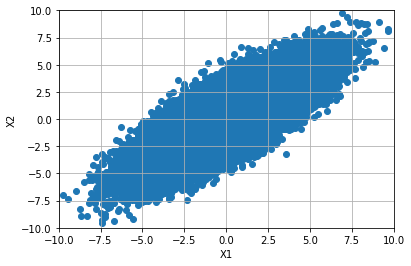

[[4.9778166 3.9832504]
 [3.9832504 4.989694 ]]
(array([1.0005006, 8.9670105], dtype=float32), array([[-0.70763373, -0.70657945],
       [ 0.70657945, -0.70763373]], dtype=float32))


In [7]:
#共分散行列と二変量ガウス分布
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt

#データ数　上げると精度が上がる
N = 10 ** 5

#乱数の生成
x1 = np.random.normal(0, 1, N)
x2 = np.random.normal(0, 3, N)

#二つの乱数列の結合　それぞれ異なるパラメータを設定したいため後から結合する
x = np.vstack([x1, x2])

#回転前の分布の表示　この時点ではx軸方向かy軸方向へ平べったい楕円形
#plt.scatter(x[0][:], x[1][:])

#xの分布の回転　これによって一般系の2次元正規分布に変形
theta = np.pi / 4
rot = np.array([[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]], np.float32)
x = np.dot(rot, x)
plt.scatter(x[0][:], x[1][:])
plt.grid()
plt.xlabel('X1')
plt.ylabel('X2')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

#共分散行列の計算
V_x1 = np.dot(x[0][:].T, x[0][:]) / N - (np.sum(x[0][:]) / N)**2
Cov_x1x2 = np.dot(x[1][:].T, x[0][:]) / N - (np.sum(x[1][:]) / N)*(np.sum(x[0][:]) / N)
Cov_x2x1 = np.dot(x[0][:].T, x[1][:]) / N - (np.sum(x[0][:]) / N)*(np.sum(x[1][:]) / N)
V_x2 = np.dot(x[1][:].T, x[1][:]) / N - (np.sum(x[1][:]) / N)**2
V_X = np.array([[V_x1, Cov_x1x2], [Cov_x2x1, V_x2]], np.float32)

#共分散行列の固有値と固有ベクトルの表示
eigenvector = LA.eig(V_X)
print(V_X)
print(eigenvector)

(図4) 共分散行列とは<br/>
共分散行列の固有値・固有ベクトルがXの分布を表している

<br/>

~ 二次形式とは ~
* 例えば変数$x, y$があるとき$F(x, y)=5x^2+3xy+2y^2$のような、どの項も2次担っている多項式のこと
* 変数が$x, y, z$の3つであるときには$F(x, y)=5x^2+4y^2+2z^2+3xy+yz+6zx$などが考えられる
* 一般的に表すと、

$
\begin{align}
F(x_1, x_2, ...,x_n)
& = \sum_{i, j=1}^{n} a_{i, j}x_i x_j\\
& = (x_1, x_2, ...,x_n)
\begin{pmatrix}
a_{11} & a_{12} & \ldots & a_{1n} \\
a_{21} & a_{22} & \ldots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{n1} & a_{n2} & \ldots & a_{nn}
\end{pmatrix}
\begin{pmatrix}
x_1\\
x_2 \\
\vdots\\
x_n
\end{pmatrix}
\end{align}
$

よって、$F(x)=x^{\mathrm{T}}Ax$

https://eman-physics.net/math/linear11.html

<br/>

$$Δ^2=(\textbf x-\textbf μ)^TΣ^{-1}(\textbf x-\textbf μ)\quad \quad (2.44)
$$

$(2.43)$の指数部分をとってきたのが$(2.44)$
* $Δ$: $μ$から$\mathrm x$までのマハラノビス距離
    * $Σ=I$⇒$Δ$=ユークリッド距離 
    * 二次形式の値がx 空間中で定数となる⇒指数部分以外も、指数部分も定数⇒確率密度関数が一定⇒ガウス分布の密度が一定

（演習2.17)http://prml.yutorihiro.com/chapter-2/2-17/　より$Σ$は対称として良いと書いてある

$$
Σ\textbf u_i=λ_i\textbf u_i.\quad \quad (2.45)
$$

* $i=1, ..., D$
* $\textbf u_i$：固有ベクトル
* $λ_i$：固有値
* 実数値の対称行列において、固有値は実数、異なる固有値に属する固有ベクトルは互いに直交する(参照 https://eman-physics.net/math/linear11.html)

$$
\textbf u^{T}_{i}\textbf u_j=I_{ij.}\quad \quad (2.46)
$$

ただし$\quad \begin{equation} 
I_{ij} = 
\begin{cases}
1 & (i=j)\\
0 & (else)
\end{cases}\quad \quad (2.47)
\end{equation}
$

（演習2.19)http://prml.yutorihiro.com/chapter-2/2-19/　より

$$
Σ=\sum_{i=1}^{D} λ_i\textbf u_i\textbf u^{T}_{i}\quad \quad (2.48)
$$

$$
Σ^{-1}=\sum_{i=1}^{D} \frac{1}{λ_i}\textbf u_i\textbf u^{T}_{i}\quad \quad (2.49)
$$

$$
Δ^2=\sum_{i=1}^{D} \frac{y^{2}_{i}}{λ_i}\quad \quad (2.50)
$$


$$y_i=\textbf u^{T}_{i}(\textbf x-\textbf μ).\quad \quad (2.51)
$$

$y_i$で構成されるベクトル$\textbf y$ は$x$を線形変換（平行移動、回転）したものである
$$
\textbf y=\textbf U(\textbf x-\textbf μ)\quad \quad (2.52)
$$

ただし、
* $\textbf U$ はその$i$行が$\textbf u^{T}_{i}$である直交行列（付録C p.313-)
* $y=(y_1, ..., y_D)^{\mathrm{T}}$

<img src="20190621190131.png">

(図4) 教科書の図2.7<br/>
$(2.52)$のように線形変換した様子を表している。(参照 https://www.slideserve.com/giulio/2 ）

ヤコビ行列$J$を導入した
$$
J_{ij} = \frac {∂x_i}{∂y_i} = U_{ji} \quad \quad (2.53)
$$


* $U_{ji}$ : 行列$U^{\mathrm{T}}$の要素

行列$U$の正規直交性を利用して

$$
|\textbf J|^2 = |\textbf U^{\mathrm{T}}|^2 = |\textbf U^{\mathrm{T}}||\textbf U| = |\textbf U^{\mathrm{T}}\textbf U| =|\textbf I| = 1\quad \quad (2.54)
$$

$$
|J|=1
$$

$$
|Σ|^{\frac {1}{2}} = \prod_{j=1}^{D}λ ^{\frac {1}{2}}_{j} \quad \quad (2.55)
$$

<div style="text-align: center;">↑(C.47参照)</div>

$$ 
p(\textbf y) = p(\textbf x)|\textbf J| = \prod_{j=1}^{D}\frac {1}{(2πλ_j)^{\frac{1}{2}}} exp
\left\{-\frac {y^{2}_{j}}{2λ_j}\right\}
\quad \quad (2.56)
$$

確かに一変数ガウス分布である
$ 
\mathcal{N}(x|μ, δ^2) = \frac{1}{(2πδ^2)^\frac{1}{2}}exp
\left\{-\frac{1}{2δ^2}(x- μ)^2\right\}
(2.42)
$
と同じ形になっている。

$\int_{-\infty}^{\infty}N(x|μ, σ^2)xdx=1\quad (1.48)$を用いると

$$
\int p(\textbf y)d\textbf y = \prod_{j=1}^{D}\int_{-∞}^{∞}\frac {1}{(2πλ_j)^{\frac{1}{2}}} exp
\left\{-\frac {y^{2}_{j}}{2λ_j}\right\}dy_j = 1\quad \quad (2.57)
$$

$$
\mathbb{E}[\mathrm{x}] = \frac{1}{(2π)^\frac{D}{2}}\frac{1}{|Σ|^\frac{1}{2}}\int exp
\left\{
-\frac{1}{2}(\mathrm{x}-\textbf μ)^{\mathrm{T}}Σ^{-1}(\mathrm{x}-\textbf μ)
\right\}\mathrm{x} d\mathrm{x}
$$

確かに多変量ガウス分布である$ 
\mathcal{N}(\mathrm{x}|\textbf μ, Σ) = \frac{1}{(2π)^\frac{D}{2}}\frac{1}{|Σ|^\frac{1}{2}}exp
\left\{
-\frac{1}{2}(\mathrm{x}-\textbf μ)^{\mathrm{T}}Σ^{-1}(\mathrm{x}-\textbf μ)
\right\}
(2.43)
$
が正規化されている

$\textbf　z = \mathrm{x}-\textbf μ$とおくと、

$$
=  \frac{1}{(2π)^\frac{D}{2}}\frac{1}{|Σ|^\frac{1}{2}}\int exp
\left\{
-\frac{1}{2}\textbf z^{\mathrm{T}}Σ^{-1}\textbf z
\right\}(\textbf z+\textbf μ)d\textbf z
\quad \quad (2.58)
$$

$$
\mathbb{E}[\mathrm{x}] = \textbf μ\quad \quad (2.59)
$$

<span style="color:red">疑問</span>▶️“1変数の場合”っていつしましたっけ？

多変量ガウス分布の2次モーメントは$\mathbb{E}[\mathrm{x}_i\mathrm{x}_j]$ で$D^2$個ある。
これらをまとめて行列$\mathbb{E}[ \mathrm{x}\mathrm{x}^{\mathrm{T}}] $と書くことができる。<br > 以下に行列$\mathbb{E}[ \mathrm{x}\mathrm{x}^{\mathrm{T}} ] $を記載する。

$$
\mathbb{E}[\mathrm{x}\mathrm{x}^{\mathrm{T}}] = \frac{1}{(2π)^\frac{D}{2}}\frac{1}{|Σ|^\frac{1}{2}}\int exp
\left\{
-\frac{1}{2}(\mathrm{x}-\textbf μ)^{\mathrm{T}}Σ^{-1}(\mathrm{x}-\textbf μ)
\right\}\mathrm{x}\mathrm{x}^{\mathrm{T}} d\mathrm{x}
$$

$(2.57)$→$(2.58)$と同様に$\textbf　z = \mathrm{x}-\textbf μ$とおくと、

$$
=  \frac{1}{(2π)^\frac{D}{2}}\frac{1}{|Σ|^\frac{1}{2}}\int exp
\left\{
-\frac{1}{2}\textbf z^{\mathrm{T}}Σ^{-1}\textbf z
\right\}(\textbf z+\textbf μ)(\textbf z+\textbf μ)^{\mathrm{T}}d\textbf z
$$

上記の式において、<br>
- もともと考えるべき項は4つ⇄$\textbf μ\textbf μ^{\mathrm{T}}$、$\textbf z\textbf z^{\mathrm{T}}$、$\textbf μ\textbf z^{\mathrm{T}}$、$\textbf z\textbf μ^{\mathrm{T}}$<br>
- $\textbf μ\textbf z^{\mathrm{T}}$と$\textbf μ\textbf z^{\mathrm{T}}$の交差項※は指数部分から消える（偶関数による対称性のため）<br>
- $μ$は定数なので積分の外に出して良い

よって、あとは残っている$\textbf z\textbf z^{\mathrm{T}}$項について考えればよい。

$
y_j= \textbf u_j^{\mathrm{T}}(\mathrm{x}-\textbfμ)(2.51) = \textbf u_j^{\mathrm{T}}\textbf z
$から

$$
\textbf z=\sum_{j=1}^{D} y_j\textbf u_j\quad \quad (2.60)
$$

$(2.48)(2.50)(2.60)$を用いると
$$
\begin{align}
\frac{1}{(2π)^ \frac{D}{2}} \frac{1}{|Σ|^ \frac{1}{2}} \int exp \left\{
- \frac{1}{2} \textbf z^{\mathrm{T}}Σ^{-1} \textbf z
\right\} \textbf z \textbf z^{\mathrm{T}}d \textbf z
& = \frac{1}{(2π)^ \frac{D}{2}} \frac{1}{|Σ|^ \frac{1}{2}} \sum_{i=1}^{D} \sum_{j=1}^{D} \textbf u_i \textbf u^{\mathrm{T}}_{j}\int exp \left\{
- \sum_{k=1}^{D} \frac{y^{2}_{k}}{2λ_k}
\right\}y_iy_jd \textbf y \\
& = \sum_{i=1}^{D} \textbf u_i \textbf u_i^{\mathrm{T}}λ_i = Σ\quad \quad (2.61)
\end{align}
$$

結果$\mathbb{E}[\mathrm{x}\mathrm{x}^{\mathrm{T}}]$は定数の$\textbf μ\textbf μ^{\mathrm{T}}$と$(2.61)$を足せばいいので
$$
\mathbb{E}[\mathrm{x}\mathrm{x}^{\mathrm{T}}] = \textbf μ\textbf μ^{\mathrm{T}} + Σ\quad \quad (2.62)
$$

確率変数$\mathrm{x}$の共分散を定義し導出する。

$$
\begin{align}
cov[\mathrm{x}]
&= \mathbb{E}
\left[
(\mathrm{x}-\mathbb{E}[\mathrm{x}])
(\mathrm{x}-\mathbb{E}[\mathrm{x}])^{\mathrm{T}}
\right](2.63)\\
& = \mathbb{E}[(\mathrm{x}-\textbf μ)(\mathrm{x}-\textbf μ)^{\mathrm{T}}]\\
& = \mathbb{E}[\mathrm{x}\mathrm{x}^{\mathrm{T}}]-2μ\mathbb{E}[\mathrm{x}]+\mathbb{E}[\textbf μ\textbf μ^{\mathrm{T}}]\\
& = \mathbb{E}[\mathrm{x}\mathrm{x}^{\mathrm{T}}]+\textbf μ\textbf μ^{\mathrm{T}}
\end{align}
$$

よって
$$
cov[\mathrm{x}] = Σ\quad \quad (2.64)
$$

これは$\mathrm{x}$の共分散を決めているので、共分散行列と呼ぶ。

<br/>
ガウス分布の自由パラメータの総数は<br/>
$\quad \quad(Σ$の持つ自由パラメータ$)+(μ$の持つ自由パラメータ$)=D(D+1)/2+D=D(D+3)/2$<br/>
これは$D$に対して二乗の割合で増加してしまうことを表しており、大規模な行列を扱ったり逆行列を求めたりする計算が困難になる。<br/>
この問題の対処の一つに、共分散行列の形式に制限を与えるという方法がある。

* 例１）共分散行列が対角であるとする ⇒ 独立パラメータの数は2Dになる ⇒ 密度が一定になる面（等高線）は座標軸に沿った楕円になる
* 例２）共分散行列が単位行列であるとする（等方分散行列）⇒ 独立パラメータの数はD+1になる ⇒ 等高線は球面になる

しかしこの方法には、確率密度の形式も大きく制限するため、データ中の興味深い相関を捉える能力を制限してしまうという欠点がある。

<img src="20190621191137.png">

(図5)共分散行列の制限とガウス分布の等高線<br/>
(参照https://www.slideshare.net/matsuolab/prml2)

<br/>

３行目以降は省略。

<br/>

## 2.3.1 条件付きガウス分布
### 2.3.1-1.  概要
"**２つの確率変数集合の同時分布$p(\mathrm x_a, \mathrm x_b)$がガウス分布に従うとき、条件付き分布$p(\mathrm x_a|\mathrm x_b)$もガウス分布に従う**" の証明が書いてある。
<br/>
### 2.3.1-2.  教科書内容とコード

$\mathrm{x}$は$\mathcal{N}(\mathrm{x}|\textbf μ, Σ)$に従うD次元のベクトルを表す。
* $\mathrm{x}$: D次元ベクトル<br>
* $\textbf μ$: D次元ベクトルの平均ベクトル<br>
* $Σ$: D×Dの共分散行列

いま$\mathrm{x}$を$\mathrm{x}_a$と$\mathrm{x}_b$に分割する。

$$
\mathrm{x} = 
\begin{pmatrix}
\mathrm{x}_a \\
\mathrm{x}_b \\
\end{pmatrix}.\quad \quad (2.65)
$$

* $\mathrm{x}_a$: D個のうちM個の要素で構成されている<br>
* $\mathrm{x}_b$: D-M個の要素で構成されている    

$$
\textbf μ = 
\begin{pmatrix}
\textbf μ_a \\
\textbf μ_b \\
\end{pmatrix}.\quad \quad (2.66)
$$

$$
Σ=
\begin{pmatrix}
Σ_{aa} & Σ_{ab} \\
Σ_{ba} & Σ_{bb} \\
\end{pmatrix}.\quad \quad (2.67)
$$

共分散行列の逆行列を精度行列という。<br>
精度（行列）を使った方が、共分散（行列）を使うよりも表しやすくなるガウス分布の性質もある。そこで、

$$
Λ ≡ Σ^{-1}.\quad \quad (2.68)
$$

$(2.68)$と定義し、今後使えるようにする。

$$
Λ=
\begin{pmatrix}
Λ_{aa} & Λ_{ab} \\
Λ_{ba} & Λ_{bb} \\
\end{pmatrix}.\quad \quad (2.69)
$$

$$
\begin{align}
-\frac{1}{2}(\mathrm{x}-\textbf μ)^{\mathrm{T}}Σ^{-1}(\mathrm{x}-\textbf μ) = 
&-\frac{1}{2}(\mathrm{x}_a-\textbf μ_a)^{\mathrm{T}}Λ_{aa}(\mathrm{x}_a-\textbf μ_a)
-\frac{1}{2}(\mathrm{x}_a-\textbf μ_a)^{\mathrm{T}}Λ_{ab}(\mathrm{x}_b-\textbf μ_b) \\
& -\frac{1}{2}(\mathrm{x}_b-\textbf μ_b)^{\mathrm{T}}Λ_{ba}(\mathrm{x}_a-\textbf μ_a)
-\frac{1}{2}(\mathrm{x}_b-\textbf μ_b)^{\mathrm{T}}Λ_{bb}(\mathrm{x}_b-\textbf μ_b)\quad \quad (2.70)\\
& = -\frac{1}{2}\mathrm{x}^{\mathrm{T}}Σ^{-1}\mathrm{x}+ \mathrm{x}^{\mathrm{T}}Σ^{-1}\textbf μ+ const.\quad \quad (2.71)
\end{align}
$$

* $\textbf μ^2$に関する項$=const$
* $\mathrm{x}^{\mathrm{T}}Σ^{-1}\textbf μ=\mathrm{x}Σ^{-1}\textbf μ^{\mathrm{T}}$

から$(2.71)$のように書けるようだ。

<span style="color:red">疑問</span>▶️↑は$Σ$の対称性から来ているのでしょうか？

<br/>

$(2.71)$と同じ展開を、指数部分が$(2.70)$となる条件付きガウス分布$p(\mathrm{x}_a|\mathrm{x}_b)(\mathrm{x}_b$を観測したときの事後分布) に適用してみよう。<br/>
* $\textbfμ_{a|b}$: 条件付き分布の平均
* $Σ_{a|b}$: 条件付き分布の分散

$\mathrm{x}_b$を定数とみなし、
$(2.70)$における$\mathrm{x}_{a}$についての二次の項をすべて取り出すと、

$$
-\frac{1}{2}\mathrm{x}^{\mathrm{T}}_{a}Λ_{aa}\mathrm{x}_a\quad \quad (2.72)
$$

$(2.71)$の右辺の第一項との比較から、$Λ_{aa}$と$Σ^{-1}$が対応していることが分かる。$Σ^{-1}$は今回$Σ^{-1}_{a|b}$なので
$$
Σ_{a|b}=Λ^{-1}_{aa}\quad \quad (2.73)
$$

$(2.70)$の
$\mathrm{x}_a$について線形の項を列挙すると

$$
\frac{1}{2}\mathrm{x}^{\mathrm{T}}_{a}Λ_{aa}μ_a,  \frac{1}{2}μ_a^{\mathrm{T}}Λ_{aa}\mathrm{x}_{a},   
-\frac{1}{2}(\mathrm{x}_b-μ_b)^{\mathrm{T}}Λ_{ba}\mathrm{x}_{a},   -\frac{1}{2}\mathrm{x}^{\mathrm{T}}_{a}Λ_{ba}(\mathrm{x}_b-μ_b)
$$

となるが、
$$
\frac{1}{2}\mathrm{x}^{\mathrm{T}}_{a}Λ_{aa}μ_a=\frac{1}{2}μ_a^{\mathrm{T}}Λ_{aa}\mathrm{x}_{a}
$$
$$
-\frac{1}{2}(\mathrm{x}_b-μ_b)^TΛ_{ba}\mathrm{x}_{a}=-\frac{1}{2}\mathrm{x}^{\mathrm{T}}_{a}Λ_{ba}(\mathrm{x}_b-μ_b)
$$
のため

$$
\mathrm{x}^{\mathrm{T}}_{a}\left\{
Λ_{aa}μ_a-Λ_{ab}(\mathrm{x}_b-μ_b)
\right\}\quad \quad (2.74)
$$
が導かれるようだ。

 $(2.71)$の議論から、
 $ (2.74)=Σ^{-1}_{a|b}\textbfμ_{a|b}\mathrm{x}^{\mathrm{T}}_{a}$であるべきなので、

$$
\textbfμ_{a|b}Σ^{-1}_{a|b}=Λ_{aa}μ_a-Λ_{ab}(\mathrm{x}_b-μ_b)
$$

両辺に$Σ_{a|b}$をかけて

$$
\begin{align}
\textbfμ_{a|b}&=Σ_{a|b}\left\{
Λ_{aa}μ_a-Λ_{ab}(\mathrm{x}_b-μ_b)
\right\} \\
&=Σ_{a|b}Λ_{aa}μ_a-Σ_{a|b}Λ_{ab}(\mathrm{x}_b-μ_b)
\end{align}
$$

$Σ_{a|b}=Λ^{-1}_{aa}(2.73)$　かつ　
$Λ^{-1}_{aa}Λ_{aa}=I$から

$$
\textbfμ_{a|b}=\textbfμ_a-Λ^{-1}_{aa}Λ_{ab}(\mathrm{x}_b-\textbfμ_b) \quad\quad (2.75)
$$

では、$(2.73)(2.75)$の結果を、もとの同時分布$p(\mathrm{x}_a, \mathrm{x}_b)$の分割された精度行列ではなく、対応する分割された共分散行列について表現しよう。
<br/>そのためには分割された行列の逆行列に関する以下の公式を用いる。（演習2.24 http://prml.yutorihiro.com/chapter-2/2-24/)
<br/>

$$
\begin{pmatrix}
A & B \\
C & D \\
\end{pmatrix}^{-1}
=\begin{pmatrix}
M & -MBD^{-1} \\
-D^{-1}CMD^{-1} & D^{-1}CMBD^{-1} \\
\end{pmatrix}.\quad \quad (2.76)
$$

$$
M=(A-BD^{-1}C)^{-1}.\quad \quad (2.77)
$$

※$M^{-1}$を$(2.76)$の部分行列$D$に関するシューア補行列という。

$$
\begin{pmatrix}
Σ_{aa} & Σ_{ab} \\
Σ_{ba} & Σ_{bb} \\
\end{pmatrix}^{-1}=
\begin{pmatrix}
Λ_{aa} & Λ_{ab} \\
Λ_{ba} & Λ_{bb} \\
\end{pmatrix}\quad \quad (2.78)
$$
と$(2.76)$を用いると、

$$
Λ_{aa}=(Σ_{aa}-Σ_{ab}Σ^{-1}_{bb}Σ_{ba})^{-1}\quad \quad (2.79)
$$

$$
Λ_{ab}=-(Σ_{aa}-Σ_{ab}Σ^{-1}_{bb}Σ_{ba})^{-1}Σ_{ab}Σ^{-1}_{bb}
\quad \quad (2.80)
$$

を得る。

このとき$(2.79)(2.80)$を用いると
$$
\begin{align}
Λ^{-1}_{aa}Λ_{ab}&=(Σ_{aa}-Σ_{ab}Σ^{-1}_{bb}Σ_{ba})
\left\{-(Σ_{aa}-Σ_{ab}Σ^{-1}_{bb}Σ_{ba})^{-1}Σ_{ab}Σ^{-1}_{bb}
\right\}\\
&=Σ_{ab}Σ^{-1}_{bb}
\end{align}
$$
であるので、$(2.75)$に代入すると
$$
\textbfμ_{a|b}=\textbfμ_a+Σ_{ab}Σ^{-1}_{bb}(\mathrm{x}_b-\textbfμ_b)\quad \quad (2.81)
$$

また$(2.79)$から
$$
Σ_{a|b}=Σ_{aa}-Σ_{ab}Σ^{-1}_{bb}Σ_{ba}\quad \quad (2.82)
$$

<br/>

## 2.3.2 周辺ガウス分布
### 2.3.2-1. 概要
"**２つの確率変数集合の同時分布$p(\mathrm x_a, \mathrm x_b)$がガウス分布に従うとき、周辺分布$p(\mathrm x_a)$, $p(\mathrm x_b)$もガウス分布に従う**" の証明が書いてある。
<br/>
### 2.3.2-2. 教科書内容とコード

$$
p(\mathrm{x}_a)=\int p(\mathrm{x}_a, \mathrm{x}_b)d\mathrm{x}_b\quad \quad (2.83)
$$

について考え、この分布もガウス分布になることを示したい。

〜方針〜<br/>
$(2.70)$において、まず$\mathrm{x}_b$に関する項を集めて周辺化し、次に残りの$\mathrm{x}_a$に関する項を集めて平均と共分散を求める
>周辺化…積分によって変数消去すること（参照 http://school-crc.kek.jp/SummerSchool07/HTML/text.htm)

$(2.70)$の
$\mathrm{x}_b$を含む項を$(2.72)(2.74)$同様に整理すると、
$$
-\frac{1}{2}\mathrm{x}^{\mathrm{T}}_{b}Λ_{bb}\mathrm{x}_b+\mathrm{x}^{\mathrm{T}}_{b}\textbf m=
-\frac{1}{2}(\mathrm{x}_b-Λ^{-1}_{bb}\textbf m)^{\mathrm{T}}Λ_{bb}(\mathrm{x}_b-Λ^{-1}_{bb}\textbf m)
+\frac{1}{2}\textbf m^{\mathrm{T}}Λ^{-1}_{bb}\textbf m\quad \quad (2.84)
$$

ただし、$\textbf m=Λ_{bb}μ_b-Λ_{ba}(\mathrm{x}_a-\textbfμ_a)\quad (2.85)$ と定義した。
<br/>

$(2.84)$の右辺はガウス分布の標準的な二次形式$\left\{
-\frac{1}{2}(\mathrm{x}-\textbf μ)^TΣ^{-1}(\mathrm{x}-\textbf μ)
\right\}$に相当する第一項に、$\mathrm{x}_b$に依存しない第二項を加えたものとなっている。

$\mathrm{x}_b$に依存している第一項を$\mathrm{x}_b$で積分すると

$$
\int exp\left\{
-\frac{1}{2}(\mathrm{x}_b-Λ^{-1}_{bb}\textbf m)^{\mathrm{T}}Λ_{bb}(\mathrm{x}_b-Λ^{-1}_{bb}\textbf m)
\right\}d\mathrm{x}_b.\quad \quad (2.86)
$$

$(2.43)$から正規化係数$\frac{1}{(2π)^\frac{D}{2}}\frac{1}{|Σ|^\frac{1}{2}}$は平均とは独立で、共分散行列のみに依存することがわかるため、$(2.84)$の右辺第二項は$\mathrm{x}_b$と全く関係ない。<br/>
よって$\mathrm{x}_b$は$(2.86)$で積分消去（周辺化）できる。

次に$(2.70)$の残りの項、$\mathrm{x}_{a}$に関する項をまとめる。(今回も$\mathrm{x}_a$に依存しない項は$const$とした）

"$(2.84)$の右辺第二項$+(2.72)+(2.74)$から$\mathrm{x}_{b}$の項を引いたもの$+const$" すなわち

$$
\frac{1}{2}\left[
Λ_{bb}\textbfμ_b-Λ_{ba}(\mathrm{x}_a-\textbfμ_a)
\right]^{\mathrm{T}}Λ^{-1}_{bb}\left[
Λ_{bb}\textbfμ_b-Λ_{ba}(\mathrm{x}_a-\textbfμ_a)
\right]-\frac{1}{2}\mathrm{x}^{\mathrm{T}}_{a}Λ_{aa}\mathrm{x}_a+\mathrm{x}^{\mathrm{T}}_{a}(Λ_{aa}\textbfμ_a+Λ_{ab}\textbfμ_b)+const \\
=-\frac{1}{2}\mathrm{x}^{\mathrm{T}}_{a}(Λ_{aa}-Λ_{ab}Λ^{-1}_{bb}Λ_{ba})\mathrm{x}_a+
\mathrm{x}^{\mathrm{T}}_{a}(Λ_{aa}-Λ_{ab}Λ^{-1}_{bb}Λ_{ba})\textbfμ_{a}+const\quad \quad\quad (2.87)
$$

$(2.71)$と比較して
$$
Σ_{a} = (Λ_{aa}-Λ_{ab}Λ^{-1}_{bb}Λ_{ba})^{-1}\quad \quad\quad (2.88)
$$

$$
Σ_{a} (Λ_{aa}-Λ_{ab}Λ^{-1}_{bb}Λ_{ba})\textbfμ_a=\textbfμ_a\quad \quad\quad (2.89)
$$
（$(2.89)$はいらない気がするが）

$$
\begin{pmatrix}
Λ_{aa} & Λ_{ab} \\
Λ_{ba} & Λ_{bb} \\
\end{pmatrix}^{-1}=
\begin{pmatrix}
Σ_{aa} & Σ_{ab} \\
Σ_{ba} & Σ_{bb} \\
\end{pmatrix}.\quad\quad (2.90)
$$

なので条件付き分布のときと同様に計算、あるいは$(2.79)$と見比べると

$$
(Λ_{aa}-Λ_{ab}Λ^{-1}_{bb}Λ_{ba})^{-1}=Σ_{aa}\quad\quad (2.91)
$$

よって
$$
\mathbb{E}[\mathrm{x}_a] = \textbf μ_a\quad \quad (2.92) \\
cov[\mathrm{x}_a]=Σ_{aa}\quad\quad (2.93)
$$
<span style="color:red">疑問</span>▶️$(2.92)(2.93)$がわかりにくいです

<img src="20190621 174252.png">

(図４)教科書の図2.9の意味<br/>
 https://www.slideserve.com/giulio/2 によると、教科書p.88の図2.9は↑のような意味を持つらしい。